In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [28]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
# Renaming columns
df.rename(columns={'race/ethnicity':'race_ethnicity', 'parental level of education':'parental_level_of_education', 'test preparation course':'test_preparation_course','math score':'math_score',
                   'reading score':'reading_score', 'writing score':'writing_score'}, inplace=True)

In [31]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
# Adding total_score column to the dataset
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [70]:
# Preparing X and y dataset
X = df.drop(columns=['average', 'total_score', 'writing_score'], axis=1)
y = df['writing_score']

In [71]:
# Target guided Ordinal Encoding is used for categorical features with many categories

# Data Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

scaler = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_encoder, cat_features),
        ("StandardScaler", scaler, num_features)
    ]
)

In [72]:
X = preprocessor.fit_transform(X)

In [73]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.39002351,  0.19399858],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.19207553,  1.42747598],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.57771141,  1.77010859],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.46775108,  0.12547206],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12609287,  0.60515772],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.71993682,  1.15336989]])

In [74]:
X.shape

(1000, 19)

In [75]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [76]:
# Evaluate model function to calculate all the metrics after model training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    rmse = np.sqrt(mse)
    return mae, mse, r2, rmse

In [77]:
# Model training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Training
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluations
    model_train_mae, model_train_mse, model_train_r2, model_train_rmse = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_r2, model_test_rmse = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3906
- Mean Absolute Error: 2.7212
- R2 Score: 0.9494
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8537
- Mean Absolute Error: 3.1713
- R2 Score: 0.9384


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.5135
- Mean Absolute Error: 3.6478
- R2 Score: 0.9104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9256
- Mean Absolute Error: 3.8964
- R2 Score: 0.8993


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.3740
- Mean Absolute Error: 2.7102
- R2 Score: 0.9499
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8612
- Mean Absolute Error: 3.2005
- R2 Score: 0.9381


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.1250
- Mean Absolute Error: 3.3235
- R2 Score: 0.9251
-----------------------

In [78]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
0,Linear Regression,0.938381
2,Ridge,0.938143
7,CatBoosting Regressor,0.916795
6,XGBRegressor,0.915462
5,Random Forest Regressor,0.913921
8,AdaBoost Regressor,0.912686
1,Lasso,0.899336
3,K-Neighbors Regressor,0.880506
4,Decision Tree,0.860031


In [79]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.84


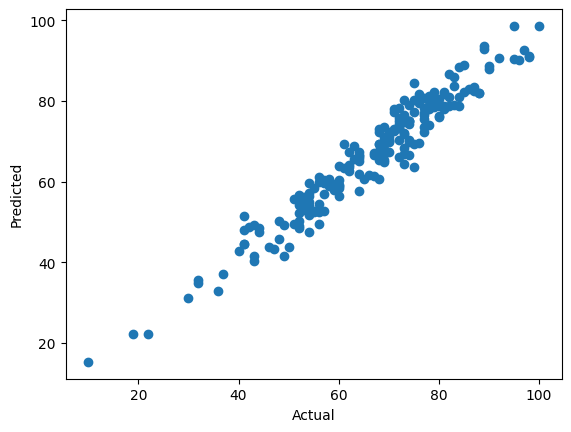

In [80]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

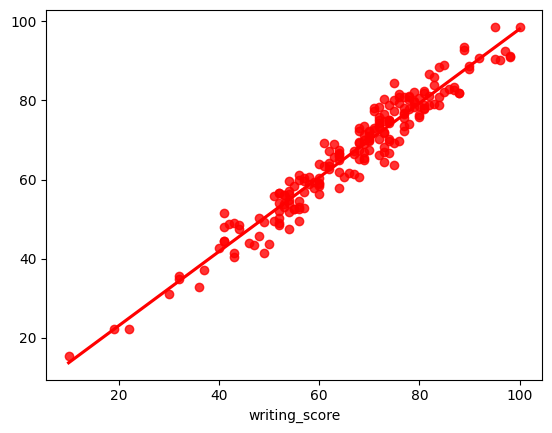

In [81]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [59]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
